The Birthday Problem


*1.* A function *birthday(n)* that returns the probability of
atleast two people sharing the same birthday in a group of n people .

In [6]:
# let 'k' denote the number of people sharing their birthday

import numpy as np

def birthday(n):   # for k = 2
    if n > 365:   # Considerig non-leap years
        return 1    # more people than days,so by pigeonhole principle one birthday is shared for sure

    total_days = 365
    prob_unique = 1.0   # all unique birthdays
    for i in range(n):  # i values from 0 to n-1
        prob_unique *= (total_days - i) / total_days

    return 1 - prob_unique

n = int(input("Enter an integer: "))

print(f"The required probability is: {birthday(n)}")

The required probability is: 0.1670247888380645


*2.* Determining the minimum number of people required for the probability of at least two sharing the same birthday to be at least 70%.

*  First, we calculate the probability of all unique birthdays by recursive multiplication.
*  We check for the complement to be just greater than 0.7, meaning that the required probability is atleast 0.7 .
*  The value of 'n' at which the loop terminates is the required vaue of n.

In [8]:
import numpy as np

n = 0
while (birthday(n)) < 0.7:  # Stop when probability of shared birthday ≥ 70%
    n += 1

print(f"Minimum number of people required: {n}")

Minimum number of people required: 30


In [9]:
from IPython.display import display, Math

# Displaying the title
display(Math(r'\textbf{Plotting the Graph of Probability vs. Total Number of People (for } k = 2\textbf{)}'))

# Displaying the main equation
display(Math(r'P(n) = 1 - \exp\left(-\frac{n^2}{730}\right)'))

# Displaying the explanation
display(Math(r'\text{The similarity in the two graphs is due to the fact that the given expression is the exponential}'))
display(Math(r'\text{approximation of the standard birthday problem.}'))

# Step 1: Probability of Unique Birthdays
display(Math(r'\textbf{Step 1: Probability of Unique Birthdays}'))
display(Math(r'P_{\text{unique}}(n) = \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \dots \times \frac{365 - n + 1}{365}'))

# Taking natural logarithm
display(Math(r'\ln P_{\text{unique}}(n) = \sum_{i=0}^{n-1} \ln \left( 1 - \frac{i}{365} \right)'))

# Approximation using ln(1 - x) ≈ -x
display(Math(r'\ln P_{\text{unique}}(n) \approx - \sum_{i=0}^{n-1} \frac{i}{365}'))

# Step 2: Summation Approximation
display(Math(r'\textbf{Step 2: Summation Approximation}'))
display(Math(r'\sum_{i=0}^{n-1} i = \frac{(n-1)n}{2}'))

# Further approximation
display(Math(r'\ln P_{\text{unique}}(n) \approx - \frac{n(n-1)}{2 \times 365}'))
display(Math(r'P_{\text{unique}}(n) \approx \exp\left(-\frac{n(n-1)}{2 \times 365}\right)'))

# Step 3: Approximation for Large n
display(Math(r'\textbf{Step 3: Approximation for Large } n'))
display(Math(r'P_{\text{unique}}(n) \approx \exp\left(-\frac{n^2}{730}\right)'))

# Final probability result
display(Math(r'P(n) = 1 - P_{\text{unique}}(n)'))
display(Math(r'P(n) \approx 1 - \exp\left(-\frac{n^2}{730}\right)'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

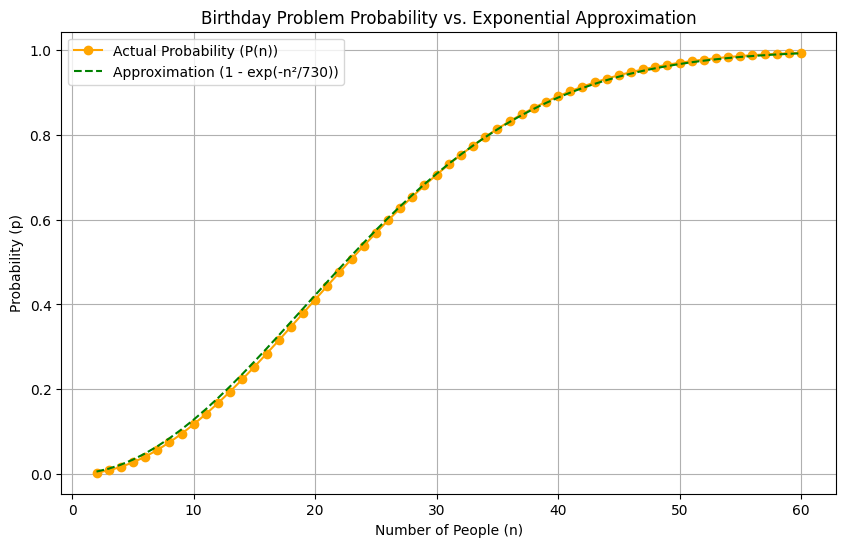

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def birthday(n):   # for k = 2
    if n > 365:   # Considerig non-leap years
        return 1    # more people than days,so by pigeonhole principle one birthday is shared for sure

    total_days = 365
    prob_unique = 1.0   # all unique birthdays
    for i in range(n):  # i values from 0 to n-1
        prob_unique *= (total_days - i) / total_days

    return 1 - prob_unique

n_values = np.arange(2, 61)  # generate values from 2 to 60
p_values = np.array([birthday(n) for n in n_values])  # Actual birthday problem probability
approx_prob = 1 - np.exp(-n_values**2 / 730)  # Exponential approximation

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(n_values, p_values, label="Actual Probability (P(n))", marker="o", linestyle="-", color="orange")
plt.plot(n_values, approx_prob, label="Approximation (1 - exp(-n²/730))", linestyle="--", color="green")

# Labels
plt.title("Birthday Problem Probability vs. Exponential Approximation")
plt.xlabel("Number of People (n)")
plt.ylabel("Probability (p)")
plt.legend()
plt.grid()
plt.show()

Buffon's Matches

A function buffons_matches(L, d) to estimate the value of π, where L is the length of the matches and d is the distance between the parallel lines.

In [7]:
import numpy as np
import matplotlib
matplotlib.use("TkAgg")  # Ensures real-time visualization
import matplotlib.pyplot as plt

print(matplotlib.get_backend())  # Check if the correct backend is used

plt.ion()  # Enable interactive mode

def buffons_matches(L, d, num_matches=500, delay=0.01):
    """
    Simulates Buffon's Matchstick Experiment to estimate π.

    Parameters:
        L (float): Length of matchstick (user input).
        d (float): Distance between parallel lines (user input).
        num_matches (int): Number of matchsticks to drop.
        delay (float): Pause between matchstick drops for visualization.
    """
    
    # Counters for matchsticks
    N = 0          # Total matchsticks thrown
    N_cross = 0    # Matchsticks that cross a line

    # Create plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 20)  # Keep fixed y-axis range
    ax.set_xticks([])   # Hide x-axis ticks
    ax.set_yticks(np.arange(0, 21, d))  # Keep y-axis labels aligned with grid

    # Draw parallel lines
    for i in np.arange(0, 20 + d, d):  
        ax.hlines(i, 0, 20, color='black', linewidth=1)

    while N < num_matches:
        N += 1
        
        # Generate a random midpoint and angle
        x_mid = np.random.uniform(0, 20)  # Random x position
        y_mid = np.random.uniform(0, 20)  # Random y position
        theta = np.random.uniform(0, np.pi)  # Random angle (0 to 180 degrees)

        # Compute endpoints of the needle (ensuring same length)
        x1 = x_mid - (L / 2) * np.cos(theta)
        x2 = x_mid + (L / 2) * np.cos(theta) 
        y1 = y_mid - (L / 2) * np.sin(theta)
        y2 = y_mid + (L / 2) * np.sin(theta)

        # Check if the needle crosses a line
        cross = (int(y1 // d) != int(y2 // d))  # True if endpoints are in different bands

        if cross:
            N_cross += 1

        # Estimate π
        pi_estimate = (2 * L * N / (d * N_cross)) if N_cross > 0 else float('inf')

        # Draw the needle with correct coloring
        color = 'r' if cross else 'b'
        ax.plot([x1, x2], [y1, y2], color=color, linewidth=2)

        ax.set_title(f'Thrown: {N}, Crossed: {N_cross}, Estimated π: {pi_estimate:.4f}')

        plt.draw()
        plt.pause(delay)

    plt.ioff()
    plt.show()


# Get user input for L and d
L = float(input("Enter matchstick length (L): "))
d = float(input("Enter distance between lines (d): "))

buffons_matches(L, d)


TkAgg
